## 1. Dataset and Objective

Dataset : A Medical Insurance Company Has Released Data For Almost 1000 Customers.  The Premium Price Is In INR(₹) Currency And Showcases Prices For A Whole Year. https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction?select=Medicalpremium.csv

Objective : *Membuat model yang dapat memprediksi Harga Premi Asuransi Kesehatan untuk setahun menggunakan model supervised learning regresi KNN, SVR*


| Column | Description |
| --- | --- |
| `Age` | Customer's age |
| `Diabetes` | Whether The Person Has Abnormal BloodSugar <br> `0` = no <br> `1` = yes |
| `BloodPressureProblems` | Whether The Person Has Abnormal Blood Pressure Levels <br> `0` = no <br> `1` = yes |
| `AnyTransplants` | Any Major Organ Transplants <br> `0` = no <br> `1` = yes |
| `AnyChronicDiseases` |Whether Customer Suffers From Chronic Ailments Like Asthama, Etc <br> `0` = no <br> `1` = yes |
| `Height` | Height Of Customer |
| `Weight` | Weight Of Customer |
| `KnownAllergies` | Whether The Customer Has Any Known Allergies <br> `0` = no <br> `1` = yes |
| `HistoryOfCancerInFamily` | Whether Any Blood Relative Of The Customer Has Had Any Form Of Cancer <br> `0` = no <br> `1` = yes |
| `NumberOfMajorSurgeries` | The Number Of Major Surgeries That The Person Has Had |
| `PremiumPrice` | Price of The Health Insurance |

## 2. Import Libraries

In [1]:

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature engineering
from sklearn.model_selection import train_test_split
from scipy.stats import kendalltau
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler, StandardScaler

# Saving
import pickle
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading
   

In [2]:
# Data Loading simpan dalam df0
df0 = pd.read_csv('Medicalpremium.csv')

# Duplicate dataset dalam df
df = df0.copy()

DATA CHECK

In [3]:
# Cek info dataset
df.info()

# Menampilkan 3 baris pertama dataset
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000


In [4]:
# Cek kolom yang memiliki missing value 
missing_values = df.isnull().sum()
print(f'column with missing value:' , missing_values [missing_values>0])


column with missing value: Series([], dtype: int64)


In [5]:
# Cek duplicate data
duplicate_rows = df.duplicated().sum()
print(f'total of duplicate row:' , duplicate_rows)

#df_duplicate = df.drop_duplicate(inplace=True)

total of duplicate row: 0


tidak ada baris yang duplicate, maka tidak perlu ada tindakan lanjut,
setelah ini kita akan menyesuaikan format data dan hanya ada satu format data yang tidak sesuai

## 4. Exploratory Data Analysis (EDA)

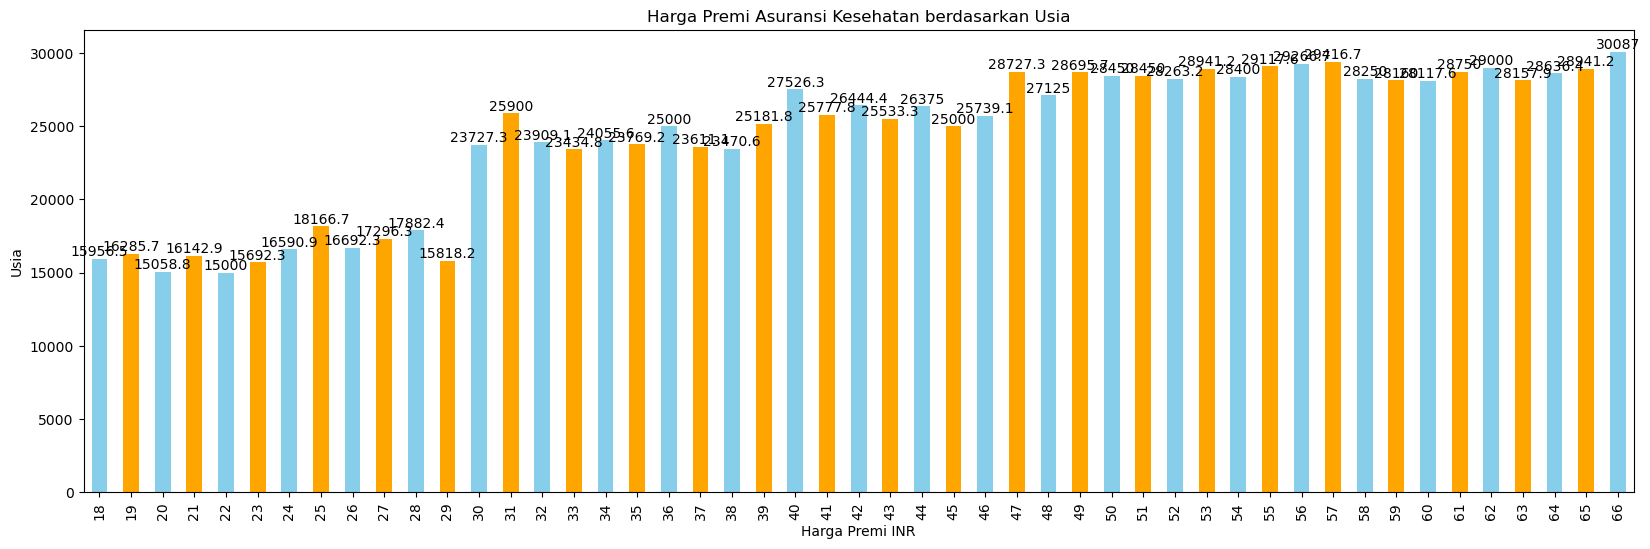

In [6]:
fig,ax1 = plt.subplots(figsize=(20,6))
installmentS = df.groupby('Age')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Harga Premi INR')
plt.ylabel('Usia')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Usia')
installmentS.bar_label(installmentS.containers[0])

#memperlihatkan plot
plt.show()

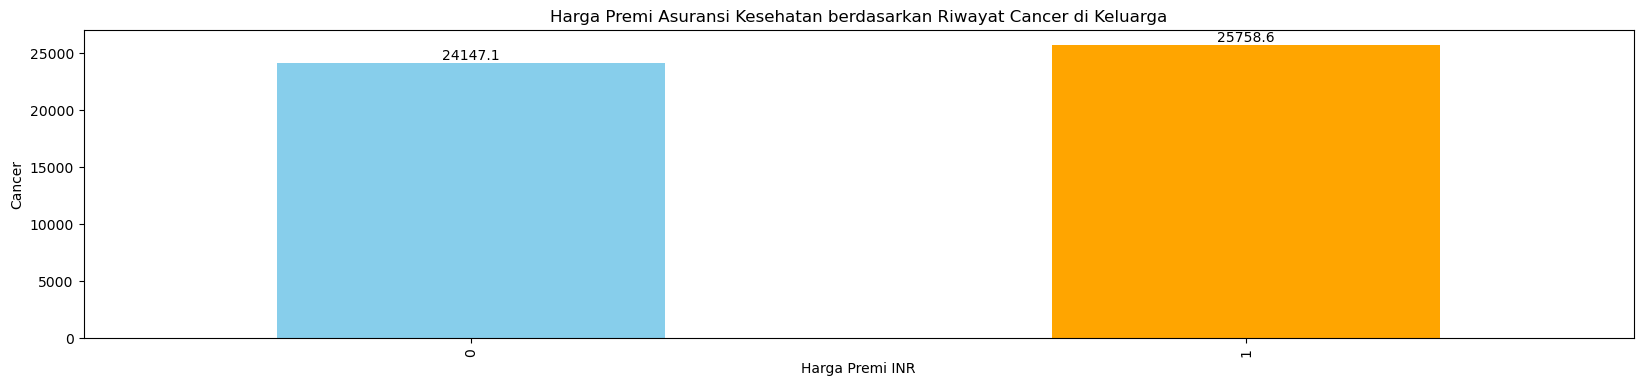

In [7]:
fig,ax1 = plt.subplots(figsize=(20,4))
installmentS = df.groupby('HistoryOfCancerInFamily')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Harga Premi INR')
plt.ylabel('Cancer')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Riwayat Cancer di Keluarga')
installmentS.bar_label(installmentS.containers[0])

#memperlihatkan plot
plt.show()

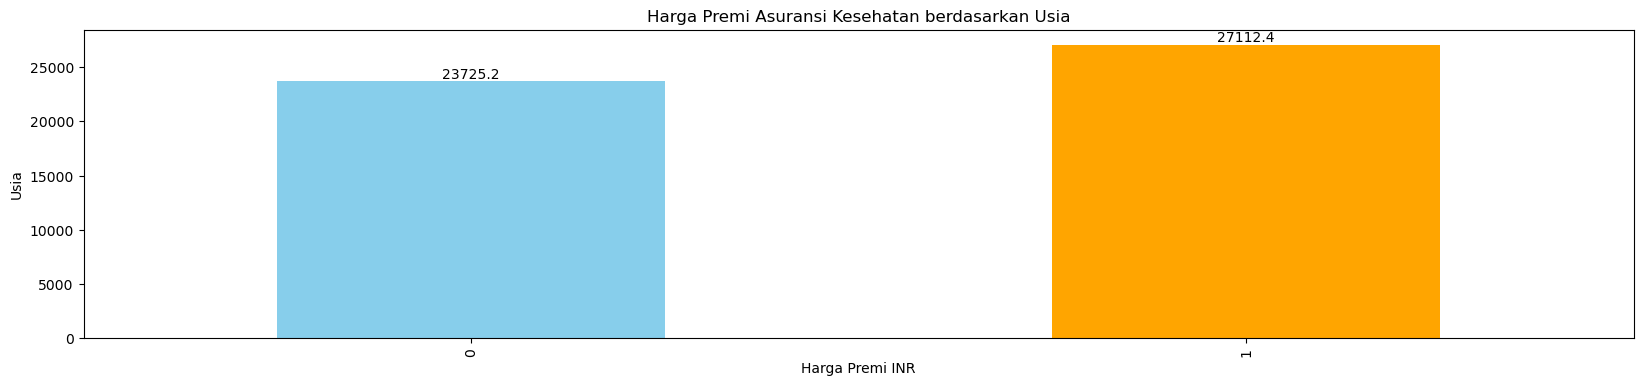

In [8]:
fig,ax1 = plt.subplots(figsize=(20,4))
installmentS = df.groupby('AnyChronicDiseases')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Harga Premi INR')
plt.ylabel('Usia')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Usia')
installmentS.bar_label(installmentS.containers[0])

#memperlihatkan plot
plt.show()

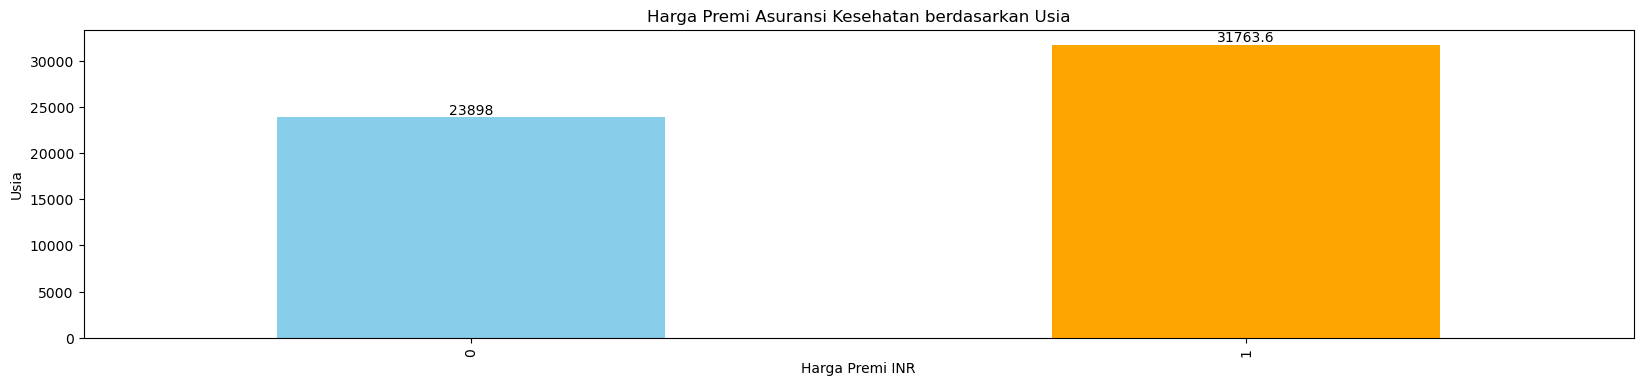

In [9]:
fig,ax1 = plt.subplots(figsize=(20,4))
installmentS = df.groupby('AnyTransplants')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Harga Premi INR')
plt.ylabel('Usia')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Usia')
installmentS.bar_label(installmentS.containers[0])

#memperlihatkan plot
plt.show()

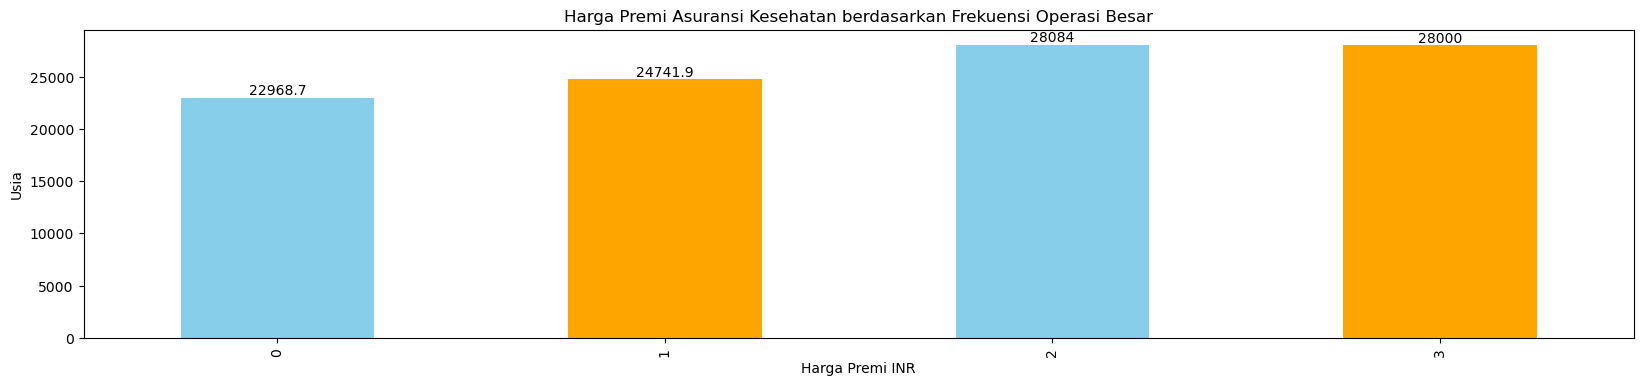

In [10]:
fig,ax1 = plt.subplots(figsize=(20,4))
installmentS = df.groupby('NumberOfMajorSurgeries')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Harga Premi INR')
plt.ylabel('Usia')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Frekuensi Operasi Besar')
installmentS.bar_label(installmentS.containers[0])

#memperlihatkan plot
plt.show()

## 5. Feature Engineering

### 5.a. Split Fitur dan Target

Sebelum memulai Feature Engineering diperlukan mengamankan dataset dimana dataset yang ada terlebih dahulu dipisahkan antara Fitur dan Target. Hal ini diperlukan supaya tidak ada data yang leak / bocor. Dataset yang tidak memiliki Null dan Duplicate dipisahkan antara kolom fitur dan kolom target yang disimpan dalam X dan y.

In [11]:
data = df.copy()

In [12]:
# Memisahkan antara 'X' (fitur) dan 'y' (target)

X = data.drop(['PremiumPrice'], axis=1)
y = data['PremiumPrice']

# Menampilkan data Fitur
X.head(3)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1


In [13]:
y.head(3)

0    25000
1    29000
2    23000
Name: PremiumPrice, dtype: int64

### 5.b. Split Data train dan Data test

In [14]:
# Memisahkan antara data-train dan data-test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

print('X Train Size' , X_train.shape)
print('X Test Size' , X_test.shape)
print('y Train size', y_train.shape)
print('y Test size', y_test.shape)

X Train Size (788, 10)
X Test Size (198, 10)
y Train size (788,)
y Test size (198,)


Setelah memisahkan antara data Fitur dan data Target, tahap selanjutnya yaitu memisahkan Data Fitur kemudian dibagi menjadi data Fitur untuk train dan test begitupula Data Target untuk train dan test, dimana kali ini memilih 20% data untuk test dan memilih lebih banyak data untuk dilatih, sehingga 80% untuk data train, menggunakan random state 100 agar datanya tidak berubah - ubah.

### 5.c. Handling Cardinality

In [15]:
# Cek Cardinality

# List berdasarkan kolom, jumlah nilai unique kolom, dan nilai unique kolomnya dari dataset yang ada

listdf = []
for col in X:
    listdf.append([col, X[col].nunique(), X[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data = listdf)

,nama kolom,jumlah nilai unique,nilai unique
0,Age,49,"[45, 60, 36, 52, 38, 30, 33, 23, 48, 66, 24, 4..."
1,Diabetes,2,"[0, 1]"
2,BloodPressureProblems,2,"[0, 1]"
3,AnyTransplants,2,"[0, 1]"
4,AnyChronicDiseases,2,"[0, 1]"
5,Height,44,"[155, 180, 158, 183, 166, 160, 150, 181, 169, ..."
6,Weight,74,"[57, 73, 59, 93, 88, 69, 54, 79, 74, 67, 97, 7..."
7,KnownAllergies,2,"[0, 1]"
8,HistoryOfCancerInFamily,2,"[0, 1]"
9,NumberOfMajorSurgeries,4,"[0, 1, 2, 3]"


Pada bagian ini kita akan mengecek jumlah nilai unique masing - masing kolom selain untuk mengecek cardinality dapat juga membantu untuk menilai kolom tersebut apakah termasuk numerikal atau kategorikal

Cardinality check :

- kolom *'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries',* termasuk kolom fitur kategorikal yang *low cardinality* sehingga tidak perlu handling. 

- kolom *'Age', 'Height', 'Weight'* termasuk kolom fitur numerikal.

### 5.d. Feature Selection
*Mencari korelasi antara kolom fitur Numerikal dengan kolom target 'PremiumPrice'*

<Axes: >

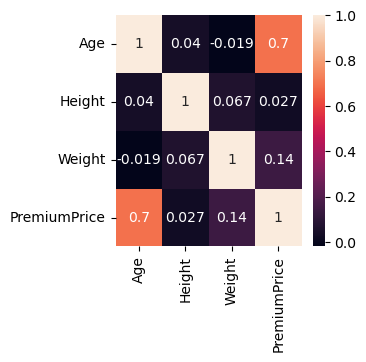

In [16]:
#mencari korelasi antara kolom fitur numerikal dengan target 'PremiumPrice'

Numeric = X[['Age', 'Height', 'Weight']]
Numeric['PremiumPrice'] = y

# Uji Pearson's
plt.figure(figsize=(3,3))
sns.heatmap(Numeric.corr(method='pearson'),annot=True)

terlihat bahwa kolom target 'PremiumPrice' ada hubungan dengan kolom fitur 'Age' dan 'Weight'

*Mencari korelasi antara kolom fitur Kategorikal dengan kolom target 'PremiumPrice'*

<Axes: >

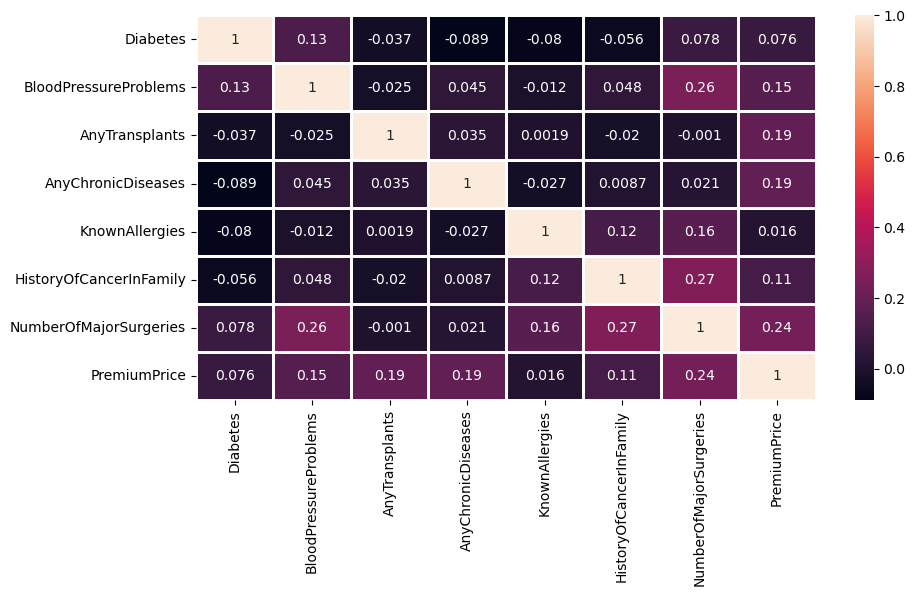

In [17]:
# Mendefinisikan kolom fitur kategorikal
category = X[['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases',
              'KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]
category['PremiumPrice'] = y

# Uji Kendall
plt.figure(figsize=(10,5))
sns.heatmap(category.corr(method='kendall'),annot=True,linewidths="1")


Dari hasil di atas dapat dilihat bahwa fitur kategorikal yang memiliki korelasi signifikan dengan 'PremiumPrice' ialah *'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'*

kolom lainnya yang pada tesnya tidak ada korelasinya dapat diabaikan

In [18]:
# Memilih Fitur yang ada korelasinya dengan Target

X_train = X_train[['Age', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Weight', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
X_test = X_test[['Age', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Weight', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]

In [19]:
# Mengecek dataset kolom X_train
X_train.head(3)

,Age,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries
501,26,0,0,1,73,0,1
637,41,1,0,1,67,0,0
424,61,1,0,0,56,1,2


### 5.e. Split Data Numerikal dan Data Kategorikal

In [20]:
# Memisahkan dataset train untuk kolom numerikal dan kolom kategorikal 

numeric  = X_train[['Age', 'Weight']]
category = X_train[['BloodPressureProblems','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]

### 5.f. Handle Outliers Data Numerikal  

In [21]:
# Mendeskripsikan dataset kolom, jumlah nilai unique kolom, dan nilai unique kolomnya dari dataset yang ada

listMean = []
for col in numeric:
  listMean.append([col, numeric[col].mean(), numeric[col].median(), 
                   numeric[col].mode()[0], numeric[col].skew(),numeric[col].kurtosis()])

pd.DataFrame(columns=['nama kolom', 'mean', 'median','mode','skew','kurtosis'], data=listMean)


,nama kolom,mean,median,mode,skew,kurtosis
0,Age,41.545685,42.0,42,0.047972,-1.133537
1,Weight,76.998731,75.0,73,0.679161,0.739044


Kolom Age tidak ada outliers dikarenakan nilai skew nya masih dibawah 0.5 sedangkan untuk kolom Weight skewnya diatas 0.5 namun tidak extreme. Metode Handling Outlier yang digunakan ialah dengan menggunakan IQR dikarenakan distribusi datanya skew dengan fold 1.r dikarenakan skew tidak ekstrem.

In [22]:
# Menggunakan 'Gaussian' untuk distribusi normal

winsorizer = Winsorizer(capping_method='gaussian', 
                tail='both', 
                fold=1.5, 
                variables=['Age'] )
X_train_capped0 = winsorizer.fit_transform(X_train)
X_train_capped0 = winsorizer.transform(X_train)


In [23]:
# Handle outlier dengan winsorizer
# Menggunakan IQR (skew tidak extreme menggunakan fold 1.5)

winsorizer = Winsorizer(capping_method='iqr', 
                tail='both', 
                fold=1.5, 
                variables=['Weight'])
X_train_capped = winsorizer.fit_transform(X_train_capped0) # menggunakan dataframe yang X_train_capped0 agar nilai proses sebelumnya tetap tersimpan
X_train_capped = winsorizer.transform(X_train_capped0)

In [24]:
# Fungsi untuk membuat plot histogram dan boxplot sebelum dan sesudah capping
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 2))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Age - Before Capping


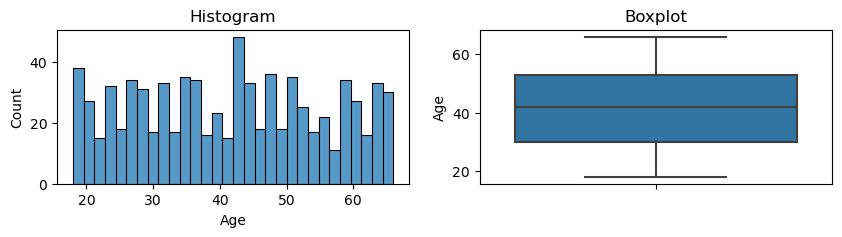


Age - After Capping


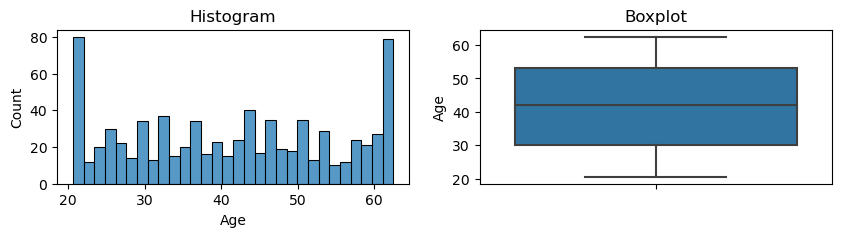

Weight - Before Capping


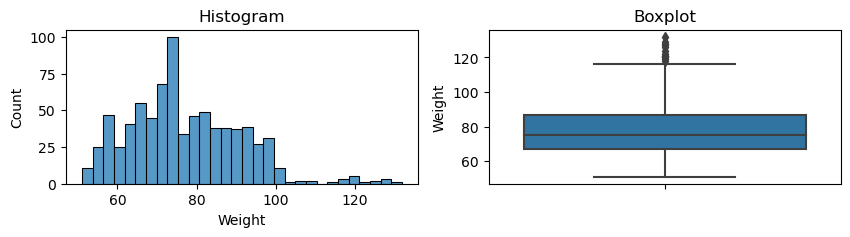


Weight - After Capping


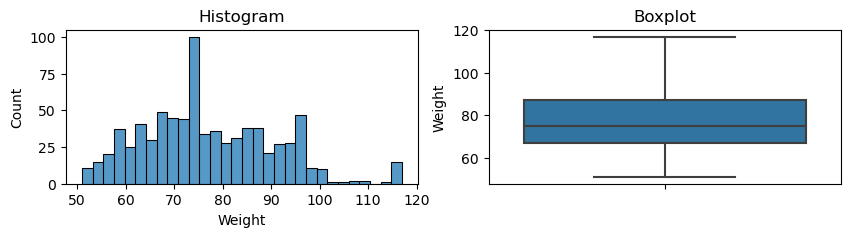

In [25]:
# show plot
for col in numeric:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

### 5.g. Check Multicollinearity

Dikarenakan kedepannya kita akan menggunakan salah satu model linier seperti linear regression dan SVR, maka kita perlu mengecek multicolinearity dan mendapatkan nilai VIF. Uji ini hanya bisa dilakukan jika data dalam kategori numerikal bukan kategorikal, dikarenakan data nya kategorikal dalam bentuk binary (0 dan 1) maka yang akan diuji hanya data yang merupakan format numerikal.

In [26]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [27]:
# Check Multicollinearity
calc_vif(X_train_capped[['Age', 'Weight']])

,variables,VIF
0,Age,7.964487
1,Weight,7.964487


Multicollinearity maksudnya ialah fitur lain tidak saling berhubungan dengan fitur lainnya, multicollinearity mencari apakah ada informasi yang sama atau tidak antara fitur. Dimana disini dilihat dari nilai VIF jika nilai VIF ada yang nilainya melebihi 10 akan kita drop kolomnya.  

### 5.h. Feature Scaling Data Numerikal & Feature Encoding Data Kategorikal 

- Feature Scaling
    - data numerical yang telah dihilangkan outliernya akan discaling dengan Feature Scaling
    - Jika distribusi data skew scaling dapat menggunakan MinMaxScaler, jika data dengan distribusi normal scaling bisa menggunakan StandardScaler, RobustScaler bisa digunakan untuk data dengan distribusi normal ataupun skew. Pertimbangan dikarenakan datanya ada yang normal dan skew serta robust scaler tidak sensitif terhadap outlier maka kita akan menggunakan RobustScaler

- Feature Encoding 
    - data categorical akan melalui proses Feature Encoding, namun dalam case ini tidak perlu dilakukan encoding dikarenakan data sudah dalam bentuk numerik


#### Pipeline

In [28]:
# # Define Numeric and Category
# num  = ['Age', 'Weight']
# cat = ['BloodPressureProblems','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']

# # Define Scaler
# scaler = RobustScaler()
# pca = PCA(n_components=0.99)

# # Training Model using pipeline

# num_pipeline = Pipeline([('scaler', scaler, 'pca', pca)])

# prep_pipe = ColumnTransformer([
#     ('pipe_num', num_pipeline, num)
# ],
#     remainder='passthrough')

# prep_pipe

# Define Numeric and Category
num  = ['Age', 'Weight']
cat = ['BloodPressureProblems','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']

# Define Scaler
scaler = RobustScaler()
pca = PCA(n_components=0.99)

# Training Model using pipeline

num_pipeline = Pipeline([('scaler', scaler),( 'pca', pca)])

prep_pipe = ColumnTransformer([
    ('pipe_num', num_pipeline, num)
],
    remainder='passthrough')

prep_pipe

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_num',
                                 Pipeline(steps=[('scaler', RobustScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.99))]),
                                 ['Age', 'Weight'])])

## 6. Model Definition


In [29]:
# Define model

knn_r = KNeighborsRegressor()

dt_r = DecisionTreeRegressor()

svm_r = SVR()

rf_r = RandomForestRegressor()

ada_r = AdaBoostRegressor()

## 7. Model Training

#### Model training dengan menggunakan parameter default (baseline model) 

In [30]:
# Define pipeline 

pipe_knn_r = Pipeline([('preprocess',prep_pipe), ('model', knn_r)])

pipe_svm_r = Pipeline([('preprocess',prep_pipe), ('model', svm_r)])

pipe_dt_r = Pipeline([('preprocess',prep_pipe), ('model', dt_r)])

pipe_rf_r = Pipeline([('preprocess',prep_pipe), ('model', rf_r)])

pipe_ada_r = Pipeline([('preprocess',prep_pipe), ('model', ada_r)])


#### Cross Validasi Model 

In [31]:
# checking cross validation score
# skfold=StratifiedKFold(n_splits=3)

cv_knn_r = cross_val_score(pipe_knn_r, X_train_capped, y_train, cv=3, scoring='r2',n_jobs=-1)
cv_svm_r = cross_val_score(pipe_svm_r, X_train_capped, y_train, cv=3, scoring='r2',n_jobs=-1)
cv_dt_r = cross_val_score(pipe_dt_r, X_train, y_train, cv=3, scoring='r2',n_jobs=-1)
cv_rf_r = cross_val_score(pipe_rf_r, X_train, y_train, cv=3, scoring='r2',n_jobs=-1)
cv_ada_r = cross_val_score(pipe_ada_r, X_train, y_train, cv=3, scoring='r2',n_jobs=-1)

model = []

cv_scores=0

for cv,name in zip([cv_knn_r,cv_svm_r,cv_dt_r,cv_rf_r,cv_ada_r],['cv_knn_r','cv_svr_r','cv_dt_r','cv_rf_r','cv_ada_r']):
    print(name)
    print('R2 score - All - Cross Validation  : ', cv)
    print('R2 score - Mean - Cross Validation : ', cv.mean())
    print('R2 score - Std - Cross Validation  : ', cv.std())
    print('R2 score - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        model = name
    else:
        pass
print('best model:', model)
print('cross-val mean:', cv_scores)

cv_knn_r
R2 score - All - Cross Validation  :  [0.65647271 0.58356278 0.64182211]
R2 score - Mean - Cross Validation :  0.6272858673181306
R2 score - Std - Cross Validation  :  0.03149011752095066
R2 score - Range of Test-Set       :  0.59579574979718 - 0.6587759848390813
--------------------------------------------------
cv_svr_r
R2 score - All - Cross Validation  :  [-0.02547094 -0.0350059  -0.0668268 ]
R2 score - Mean - Cross Validation :  -0.04243454818329506
R2 score - Std - Cross Validation  :  0.01768172985958794
R2 score - Range of Test-Set       :  -0.060116278042883 - -0.024752818323707123
--------------------------------------------------
cv_dt_r
R2 score - All - Cross Validation  :  [0.75345262 0.60243324 0.77271754]
R2 score - Mean - Cross Validation :  0.7095344694231911
R2 score - Std - Cross Validation  :  0.07613929579034619
R2 score - Range of Test-Set       :  0.6333951736328449 - 0.7856737652135373
--------------------------------------------------
cv_rf_r
R2 score 

#### Model yang terbaik dari hasil Cross Validasi


#### Hyperparameter Tuning dengan GridSearchCV

In [32]:
params = [{
          'model__n_estimators':[100,150,200,250,300],
          'model__criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
          'model__max_depth':[None, 10,20,30,40,50]
          }]

grid = GridSearchCV(pipe_rf_r, params, cv=3, verbose=3, scoring='r2', n_jobs=-1)

grid.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['Age',
                                                                          'Weight'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'model__criterion': ['squared_error',
                                               'absolute_error', 'friedman_mse',
                                               'poisson'],
                          'model__max_depth': [None, 10, 20, 30, 40, 50],
                          'model__n_estimators': [100, 150, 200, 250, 300]}],
             scoring='r2', verbose=3)

In [33]:
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['Age', 'Weight'])])),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=40,
                                       n_estimators=200))])

In [40]:
grid.best_score_

0.8188203571506074

#### Hasil Setelah di Hyperparameter Tuning

In [41]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_train_pred = grid.best_estimator_.predict(X_train)
y_test_pred = grid.best_estimator_.predict(X_test)

print("="*20,"TRAINING","="*20)
print("MAE:",mean_absolute_error(y_train,y_train_pred))
print("MSE:",mean_squared_error(y_train,y_train_pred))
print("RMSE:",mean_squared_error(y_train,y_train_pred,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("\n")
print("="*20,"TEST","="*20)
print("MAE:",mean_absolute_error(y_test,y_test_pred))
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",mean_squared_error(y_test,y_test_pred,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

==================== TRAINING ====================
MAE: 698.2519035532995
MSE: 3666939.0149111673
RMSE: 1914.9253288081934
MAPE: 0.025680903219999638
R2 Score: 0.9055199869412602


==================== TEST ====================
MAE: 1328.5227272727273
MSE: 9967345.359848484
RMSE: 3157.1102862979756
MAPE: 0.05086675819865922
R2 Score: 0.7490257965541449


In [42]:
y_test.mean()

24505.050505050505

## 8. Model Evaluation

### Feature Importances
Feature importances dilakukan untuk mencari kolom yang paling mempengaruhi target

In [37]:
grid.best_estimator_.named_steps['model'].feature_importances_

array([0.08367595, 0.7141885 , 0.00181353, 0.0917082 , 0.03255685,
       0.03832866, 0.03772831])

In [38]:
# Assuming X_train_capped is a DataFrame, and grid.best_estimator_ contains your trained model
params = {
    'Feature': X_train_capped.columns.tolist(),
    'Random Forest Feature Importance': grid.best_estimator_.named_steps['model'].feature_importances_.tolist()
}

coef = pd.DataFrame(params)
coef = coef.sort_values(by="Random Forest Feature Importance", ascending=False)

# Display the sorted DataFrame
print(coef)


                   Feature  Random Forest Feature Importance
1    BloodPressureProblems                          0.714188
3       AnyChronicDiseases                          0.091708
0                      Age                          0.083676
5  HistoryOfCancerInFamily                          0.038329
6   NumberOfMajorSurgeries                          0.037728
4                   Weight                          0.032557
2           AnyTransplants                          0.001814


## 9. Model Saving


In [39]:
with open("model.pkl", "wb") as f:
    pickle.dump(grid, f)

## 10. Model Inference
   

data Model Inference bisa dilihat pada file P1M2_nadia_Inference.ipynb

## 11. Pengambilan Kesimpulan

